Grupo de trabajo: Alejandro Hernández A.-Nicolás Morales-Durán.

##Experimento 1

En este experimento vamos a simular un gas de partículas en una caja que siguen una interacción dada por un potencial de Lennard-Jones truncado para corroborar las propiedades estadísticas de éste, en particular la distribución de velocidades de las partículas.
Este potencial describe las interacciones entre pares de átomos o mol´culas neutrales y se puede expresar como:

\begin{equation}
\large 
V_{LJ}= 4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]
\end{equation}

Como estamos restringidos a dos dimensiones la distribución de velocidades que se esperaría encontrar no es la de Maxwell sino la de Rayleigh, que viene dada por: 

\begin{equation}
f(x,\sigma)= \frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}}
\end{equation}

Donde $\sigma$ es el parámetro de escala de la distribución, la idea es ver si la simulación para 1600 partículas se ajusta a esta distribución o no.

Vale la pena tener en cuenta que se debe considerar un ensamble estadístico, generalmente el canónico, para ver cómo se distribuyen las velocidades de las partículas. Además al considerar interacciones entre las partículas que componen un gas, este puede considerarse como un líquido, dependiendo del potencial considerado.

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
%pylab
from matplotlib import animation

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [6]:
choreography=genfromtxt("Rayleigh.csv",delimiter=",") #Tomamos los resultados del experimento y los definimos como arreglos.
x=choreography[:,0]
y=choreography[:,1]
xdot=choreography[:,2]
ydot=choreography[:,3]

In [7]:
len(x)/1600 #El número total de pasos que tiene el experimento.

251

Populating the interactive namespace from numpy and matplotlib


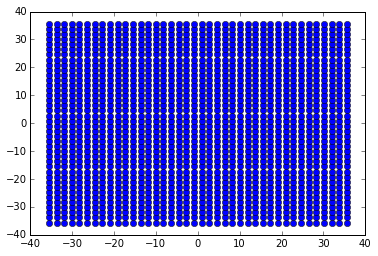

In [33]:
%pylab inline
figure()
plot(x[0:1600],y[0:1600],"o")
show()

Populating the interactive namespace from numpy and matplotlib


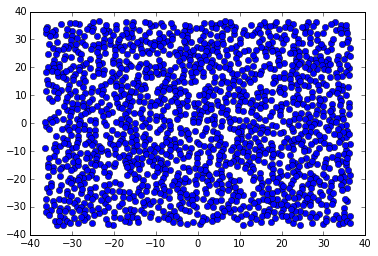

In [34]:
%pylab inline
figure()
plot(x[-1:-1601:-1],y[-1:-1601:-1],"o")
show()

En los cuadros anteriores vemos la disposición inicial y final de las partículas respectivamente, el sistema comienza con condiciones periódicas y las partículas tienen una velocidad inicial aleatoria. En la siguiente animación se ve la evolución del gas de partículas para corroborar que efectivamente inicia y termina respectivamente en las disposiciones previamente mostradas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit
%matplotlib 

Using matplotlib backend: MacOSX


In [8]:
%matplotlib
fig = plt.figure(figsize=(15,15))

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(len(x)/1600):
    im = plt.plot(x[i*1600:(i+1)*1600],y[i*1600:(i+1)*1600],'ko')
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,repeat_delay=1000)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('Particles.mp4', writer=writer)

plt.show()

Using matplotlib backend: MacOSX


In [4]:
from scipy.optimize import curve_fit

In [5]:
ray = array(sqrt(xdot[400000:401600]**2+ydot[400000:401600]**2)) #Arreglo de las rapideces de las partículas en el estado de equilibrio.

In [72]:
def f(x,s):
    return (x/s**2)*exp(-x**2/2*(s**2)) #Función a la que vamos a ajustar el fit

In [74]:
rayin = array(sqrt(xdot[0:1600]**2+ydot[0:1600]**2)) #Arreglo de las rapideces de las partículas en el estado de inicial.

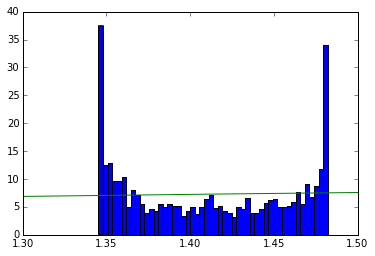

In [78]:
fitparts, cov = curve_fit(f,hist(rayin,normed=True,bins=50,color= 'blue')[1][0:50],hist(rayin,normed=True,bins=50)[0]) 

thisxdot=linspace(1.3,1.5,1000)
thisydot=f(thisxdot,*fitparts)
plot(thisxdot,thisydot)

show()

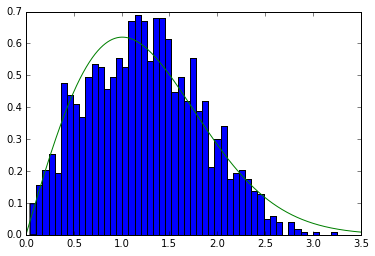

In [73]:
fitparts, cov = curve_fit(f,hist(ray,normed=True,bins=50,color= 'blue')[1][0:50],hist(ray,normed=True,bins=50)[0]) 

thisxdot=linspace(0,3.5,1000)
thisydot=f(thisxdot,*fitparts)
plot(thisxdot,thisydot)

show()

Los histograma anteriores muestran la distribución de rapideces de las partículas en el primer y último instante respectivamente, es decir, para los primeros y los últimos 1600 datos.

Vemos que efectivamente las partículas comienzan con una rapidez constante aleatoria que asigna el programa, sin embargo lo que nos interesa es el estado final del gas entonces hay que dejar evolucionar al sistema para encontrar resultados similares a los predichos por la física estadística, pues las partículas comienzan todas con la misma velocidad en ambas direcciones.

Vemos que el fit del histograma se asemeja al menos a simple vista a la gráfica de la distribución de Raylegih por lo que la simulación si se asemeja a un gas real en dos dimensiones. La siguiente animación muestra la evolución de la distribución de velocidades de las partículas.

In [7]:
%matplotlib

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.clear()
    a = plt.hist(velocities[i*1600:(i+1)*1600],normed=True,bins=50,color= 'blue')
    fitparts,cov = curve_fit(f,a[1][:50],a[0])    
    ax.plot(a[1],f(a[1],*fitparts),'r',linewidth=2.0,label=str(i))  
    ax.legend()
    
ani = animation.FuncAnimation(fig, animate,interval=100,repeat_delay=1000)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
ani.save('Histograms.mp4', writer=writer,fps=1)

plt.show()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


##Conclusiones
Podemos apreciar que la evolución de las partículas que modelan un gas en una caja nos da una distribución de rapideces que se asemeja a la de Rayleigh. Errores pueden venir dados pues un gas bidimensional debería obedecer la distribución de velocidades esperada en el límite termodinámico, es decir, cuando el número de partículas sea muy grande, por tanto necesitaríamos más de 1600 partículas para tener resultados más precisos pero eso implicaría más poder computacional.

A partir de esta simulación sería interesante encontrar otras propiedades termodinámicas del gas como la presión o la temperatura para corroborar experimentalmente algunas relaciones termodinámicas que se ven en la clase de Física Estadística. Otra extensión interesante de este experimento sería hacer una simulación en 3 dimensiones del gas para corroborar si en efecto se cumple la ley de distribución de velocidades de Maxwell, que caracteriza a los gases reales.

Finalmente, en un gas o líquido de la naturaleza es muy poco probable que las distribuciones iniciales de las partículas sean completamente ordenadas como es el caso de nuestro experimento. Eso implica que al avanzar el tiempo y moverse las partículas la entropía del gas aumentará debido a que el desorden incrementa. 